In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Read the data using the online source in an excel sheet
url_LondonHousePrices = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls'
properties = pd.read_excel(url_LondonHousePrices, sheet_name = 'Average price', index_col = None)   
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [3]:
#Transpose the DataFrame to see clearly the London's boroughs against the time. 
properties = properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588


In [4]:
#Reset the index after the transpose
properties = properties.reset_index()
properties.head()

,index,0,1,2,3,4,5,6,7,8,...,293,294,295,296,297,298,299,300,301,302
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588


In [5]:
#Put the dates in the first column
properties.columns = properties.iloc[0]
properties.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588


In [6]:
#Rename the first two columns. Borough for the first one and zip code for the second one
new_cols = ['Borough', 'Zip Code']
properties.rename(columns=dict(zip(properties.columns[:2], new_cols)),inplace=True)
properties.head()

,Borough,Zip Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588


In [7]:
#Drop all the NaN values
properties.drop(properties.head(1).index, inplace = True)
properties.dropna(how = 'any', inplace = True)
pd.set_option("max_rows", None)
properties

,Borough,Zip Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482101,474460,472981,487091,500800,494697,432511,429917,425607,479542
6,Bromley,E09000006,81671.5,81657.6,81449.3,81124.4,81542.6,82382.8,82898.5,82054.4,...,429107,431117,434577,441618,440627,439745,437389,440183,436152,437030
7,Camden,E09000007,120933,119509,120282,120098,119929,121887,124028,125530,...,838991,874543,888653,865211,838982,805983,821779,802771,800737,792861
8,Croydon,E09000008,69158.2,68951.1,68712.4,68610,68844.9,69052.5,69142.5,68993.4,...,364016,363768,366446,364880,364944,364050,367288,369641,371704,373110
9,Ealing,E09000009,79885.9,80897.1,81379.9,82188.9,82077.1,81630.7,82352.2,82706.7,...,464382,473437,474666,475413,474267,478557,475626,468124,467195,470814
10,Enfield,E09000010,72514.7,73155.2,72190.4,71442.9,70630.8,71348.3,71837.5,72237.9,...,388420,390694,387514,393024,386347,392878,393460,400903,390338,392895


In [8]:
#Create the list with the London's boroughs
london_boroughs = []
for i in properties['Borough'][1:33]:
    london_boroughs.append(i)
print(london_boroughs)


['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


In [9]:
#Get rid of the first column since City of London is not a Borough. Slicing from the second item in borough until the 33rd item.
properties = properties.iloc[1:33]
pd.set_option("max_rows", None)
properties

,Borough,Zip Code,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482101,474460,472981,487091,500800,494697,432511,429917,425607,479542
6,Bromley,E09000006,81671.5,81657.6,81449.3,81124.4,81542.6,82382.8,82898.5,82054.4,...,429107,431117,434577,441618,440627,439745,437389,440183,436152,437030
7,Camden,E09000007,120933,119509,120282,120098,119929,121887,124028,125530,...,838991,874543,888653,865211,838982,805983,821779,802771,800737,792861
8,Croydon,E09000008,69158.2,68951.1,68712.4,68610,68844.9,69052.5,69142.5,68993.4,...,364016,363768,366446,364880,364944,364050,367288,369641,371704,373110
9,Ealing,E09000009,79885.9,80897.1,81379.9,82188.9,82077.1,81630.7,82352.2,82706.7,...,464382,473437,474666,475413,474267,478557,475626,468124,467195,470814
10,Enfield,E09000010,72514.7,73155.2,72190.4,71442.9,70630.8,71348.3,71837.5,72237.9,...,388420,390694,387514,393024,386347,392878,393460,400903,390338,392895
11,Greenwich,E09000011,62300.1,60993.3,61377.8,61927.7,63513,64751.6,65486.3,65076.4,...,380154,388281,397410,396758,403347,400494,403851,398436,397717,395484


In [10]:
#Melt the data to make this tidy date
properties = pd.melt(properties, id_vars = ['Borough', 'Zip Code'], value_name = 'Price').dropna()
properties.head()

,Borough,Zip Code,0,Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2
1,Barnet,E09000003,1995-01-01,93284.5
2,Bexley,E09000004,1995-01-01,64958.1
3,Brent,E09000005,1995-01-01,71306.6
4,Bromley,E09000006,1995-01-01,81671.5


In [11]:
#Rename the colum 0 to Date
properties.rename(columns={0: 'Date'}, inplace=True)
properties.head()

,Borough,Zip Code,Date,Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2
1,Barnet,E09000003,1995-01-01,93284.5
2,Bexley,E09000004,1995-01-01,64958.1
3,Brent,E09000005,1995-01-01,71306.6
4,Bromley,E09000006,1995-01-01,81671.5


In [12]:
#Make sure date is a datetime and not a string 
properties['Date'] = pd.to_datetime(properties['Date'], format = '%y, %m, %d')
properties = properties.drop(columns = 'Zip Code')

In [13]:
#Calculate the ratio from 1998 to 2018
ratios = []
for borough in london_boroughs:
    properties_filter = properties[properties['Borough'] == borough]
    properties_filter = properties_filter[(properties_filter['Date'] > '1997-12-01')] 
    properties_filter = properties_filter[(properties_filter['Date'] < '2019-01-01')] 
    properties_filter.set_index('Date', inplace = True)
    properties_filter['Price'] = properties_filter['Price'].apply(pd.to_numeric) 
    properties_filter = properties_filter['Price'].resample('A').mean()
    ratio = properties_filter['2018-12-31']/properties_filter['1998-12-31']
    ratios.append(ratio)
    print(borough)
    print(properties_filter)

Barking & Dagenham
Date
1998-12-31     60285.821083
1999-12-31     65320.934441
2000-12-31     77549.513290
2001-12-31     88664.058223
2002-12-31    112221.912482
2003-12-31    142498.927800
2004-12-31    158175.982483
2005-12-31    163360.782017
2006-12-31    167853.342558
2007-12-31    184909.807383
2008-12-31    187356.865783
2009-12-31    156446.896358
2010-12-31    166560.705275
2011-12-31    163465.144225
2012-12-31    165863.911600
2013-12-31    173733.624933
2014-12-31    201172.229417
2015-12-31    233460.107425
2016-12-31    273919.636042
2017-12-31    287734.717358
2018-12-31    295196.673612
Freq: A-DEC, Name: Price, dtype: float64
Barnet
Date
1998-12-31    122359.468033
1999-12-31    136004.512067
2000-12-31    167952.633958
2001-12-31    185563.352600
2002-12-31    220746.059225
2003-12-31    251212.927683
2004-12-31    271854.112992
2005-12-31    279459.669683
2006-12-31    291337.796208
2007-12-31    326915.498517
2008-12-31    330023.313392
2009-12-31    299103.014817

Hillingdon
Date
1998-12-31     97676.048952
1999-12-31    108925.420758
2000-12-31    131432.235433
2001-12-31    145293.690417
2002-12-31    172147.039125
2003-12-31    202707.807350
2004-12-31    215696.088150
2005-12-31    222899.783100
2006-12-31    231405.063650
2007-12-31    253838.660325
2008-12-31    255580.288308
2009-12-31    228275.793892
2010-12-31    247991.526308
2011-12-31    251781.663308
2012-12-31    260476.430350
2013-12-31    270594.762125
2014-12-31    305781.947600
2015-12-31    352748.345325
2016-12-31    400791.486383
2017-12-31    413586.547825
2018-12-31    410266.079010
Freq: A-DEC, Name: Price, dtype: float64
Hounslow
Date
1998-12-31     99746.069682
1999-12-31    112073.661042
2000-12-31    136624.857775
2001-12-31    153622.969375
2002-12-31    175132.157400
2003-12-31    198261.234492
2004-12-31    215827.150708
2005-12-31    222920.927450
2006-12-31    237044.459808
2007-12-31    260228.206167
2008-12-31    262945.495542
2009-12-31    236242.593458
2010-

Waltham Forest
Date
1998-12-31     75557.474132
1999-12-31     83821.587936
2000-12-31    103030.676566
2001-12-31    118843.459333
2002-12-31    148137.483958
2003-12-31    175075.867192
2004-12-31    191377.779783
2005-12-31    197240.441783
2006-12-31    209707.758583
2007-12-31    237017.267950
2008-12-31    232886.473042
2009-12-31    204935.075008
2010-12-31    222102.287167
2011-12-31    220905.441058
2012-12-31    230726.511517
2013-12-31    254265.265442
2014-12-31    314934.397100
2015-12-31    357513.365125
2016-12-31    413149.270708
2017-12-31    436116.502500
2018-12-31    440859.411128
Freq: A-DEC, Name: Price, dtype: float64
Wandsworth
Date
1998-12-31    125406.807233
1999-12-31    145339.809767
2000-12-31    184275.835267
2001-12-31    205179.661233
2002-12-31    232805.560442
2003-12-31    253342.476767
2004-12-31    271649.723533
2005-12-31    284182.075767
2006-12-31    310943.885592
2007-12-31    372077.557308
2008-12-31    363817.597450
2009-12-31    340372.939092

In [14]:
#Create new data frame with the London Borough and its ratio
list_of_tuples = list(zip(london_boroughs, ratios))
list_of_tuples
ratios_df = pd.DataFrame(list_of_tuples, columns = ['London Borough', 'Ratio']) 
ratios_df.set_index('London Borough', inplace = True)
ratios_df


,Ratio
London Borough,
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785
Camden,4.935353
Croydon,4.201100
Ealing,4.311451
Enfield,4.263472


In [15]:
#Sort the values from highest to lowest to check the order of prices 
ratios_df.sort_values(by=['Ratio'], ascending = False)

,Ratio
London Borough,
Hackney,6.198286
Waltham Forest,5.834756
Southwark,5.516485
Lewisham,5.449221
Westminster,5.353565
Newham,5.305390
Haringey,5.134625
Kensington & Chelsea,5.082465
Lambeth,4.957751


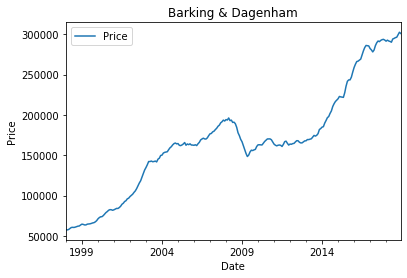

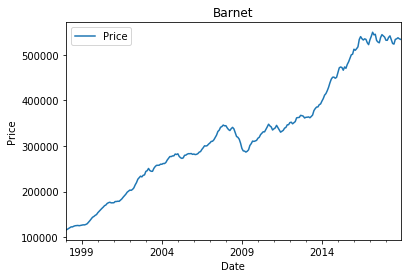

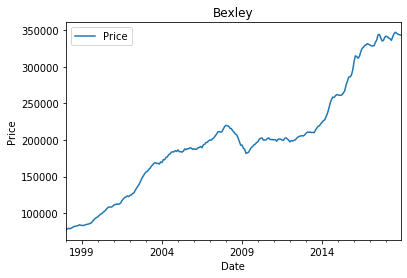

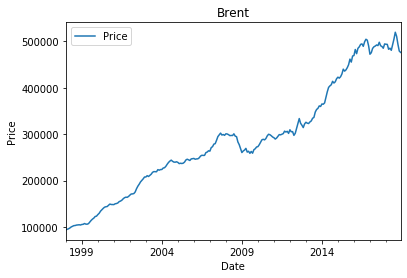

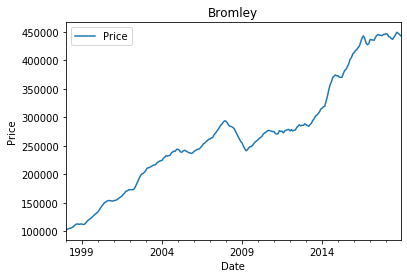

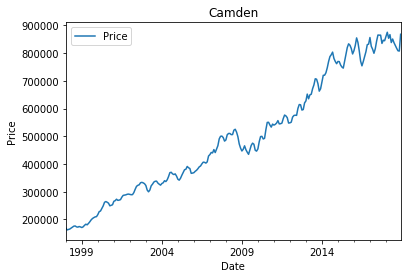

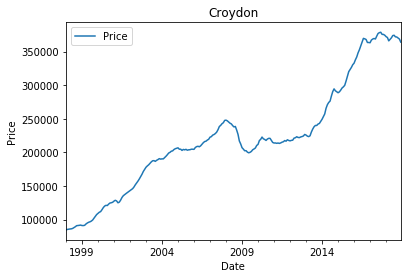

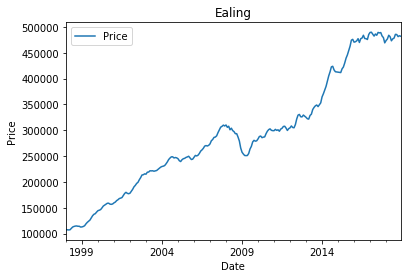

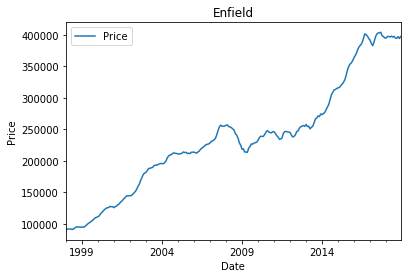

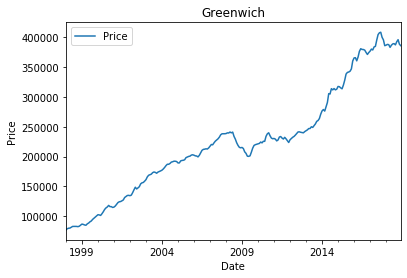

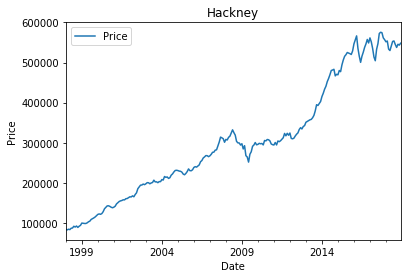

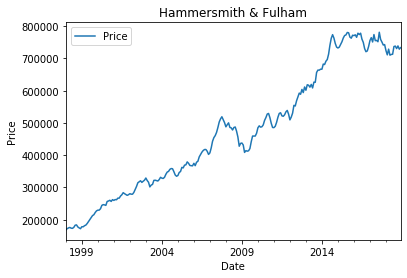

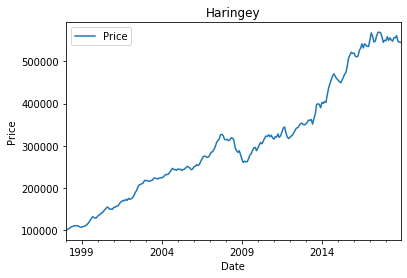

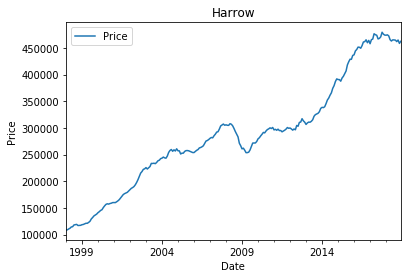

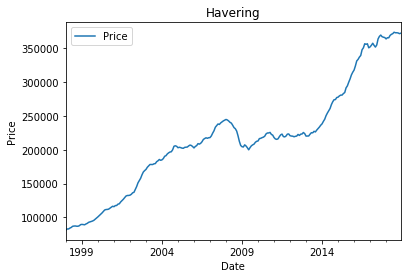

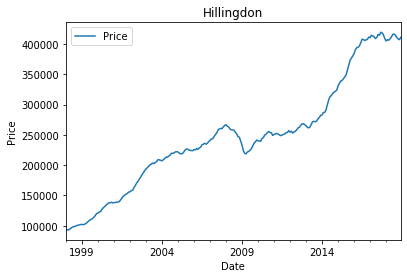

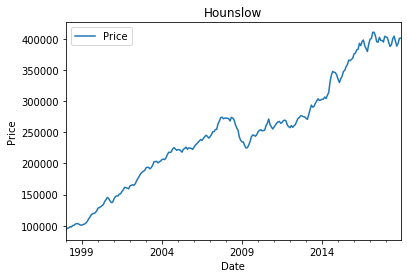

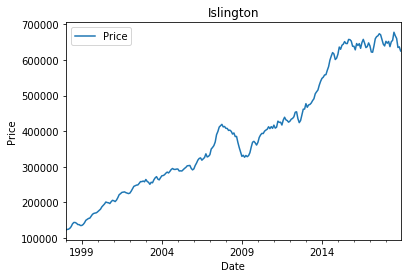

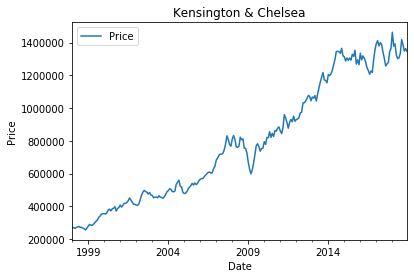

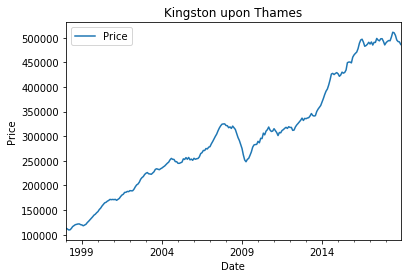

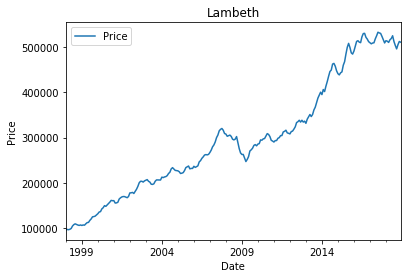

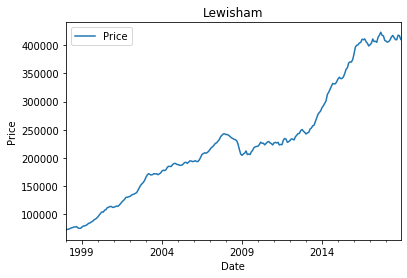

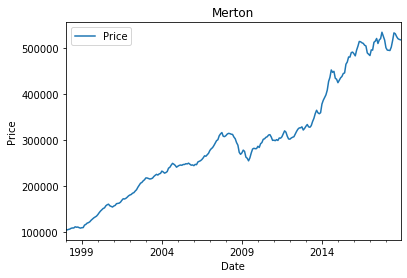

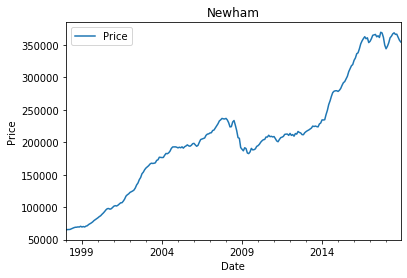

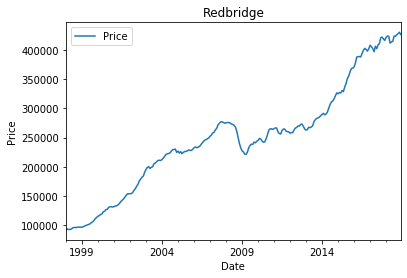

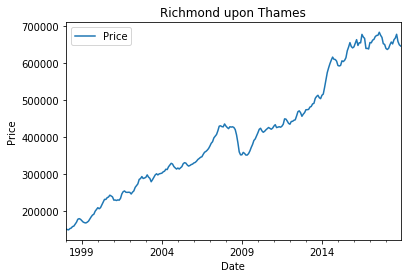

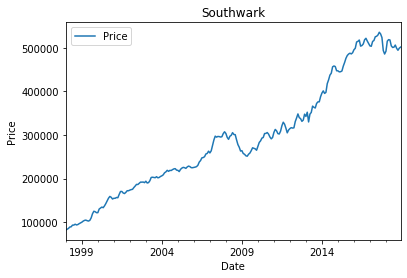

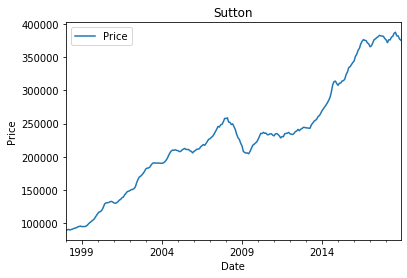

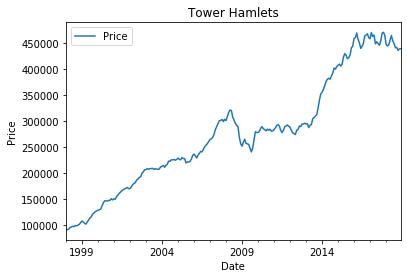

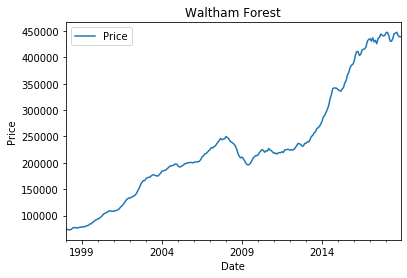

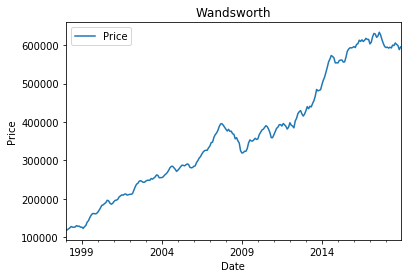

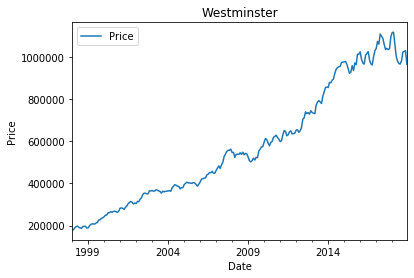

In [21]:
#Plot how much the prices have change from 1998 to 2018
for borough in london_boroughs:
    properties_filter_2 = properties[properties['Borough'] == borough]
    properties_filter_2 = properties_filter_2[(properties_filter_2['Date'] > '1997-12-01')] 
    properties_filter_2 = properties_filter_2[(properties_filter_2['Date'] < '2019-01-01')] 
    properties_filter_2.plot(x = 'Date', y = 'Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(borough)
    plt.show()
